<a href="https://colab.research.google.com/github/sugban/Spark-Internship/blob/main/Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans


In [3]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


*No NULL values in the dataset*

In [5]:
iris_df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [6]:
# To check the corelation between the data

corr = iris_df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [8]:
#getting all the unique values in SepalLengthCm
iris_df["sepal length (cm)"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [9]:
#getting all the unique values in SepalWidthCm
iris_df["sepal width (cm)"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

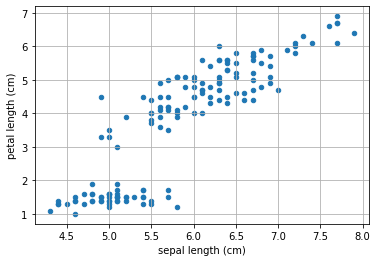

In [12]:
iris_df.plot(kind ="scatter", 
          x ='sepal length (cm)', 
          y ='petal length (cm)') 
plt.grid()

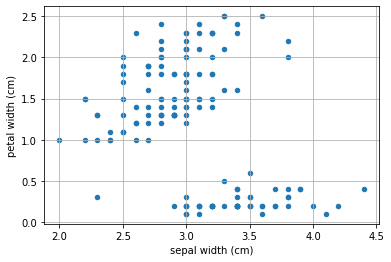

In [13]:
iris_df.plot(kind ="scatter", 
          x ='sepal width (cm)', 
          y ='petal width (cm)') 
plt.grid()

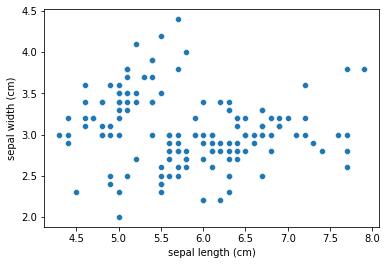

In [16]:
sns.scatterplot(x=iris_df["sepal length (cm)"], y=iris_df["sepal width (cm)"])
plt.show()

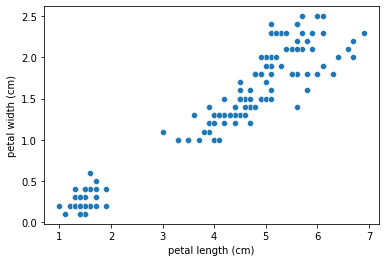

In [17]:
sns.scatterplot(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"])
plt.show()

In [43]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values

**K-means clustering** is one of the simplest and popular unsupervised machine learning algorithms<br>
K Means segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns.<br>

We Can Choose the right number of clusters with the help of the **Within-Cluster-Sum-of-Squares** (*WCSS*) method.

WCSS Stands for the sum of the squares of distances of the data points in each and every cluster from its centroid.

The main idea is to minimize the distance between the data points and the centroid of the clusters. The process is iterated until we reach a minimum value for the sum of distances.

###Using the elbow method to find the optimal number of clusters

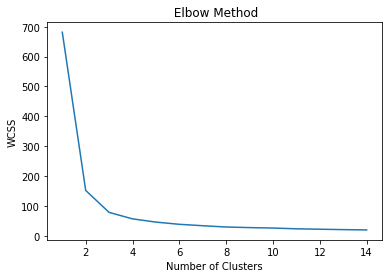

In [25]:
#k-means clustering

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title(' Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Conclusion:
From the given ‘Iris’ dataset, the optimum number of clusters been predicted is **3**

In [49]:
# Creating the kmeans classifier

kmeans = KMeans(3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

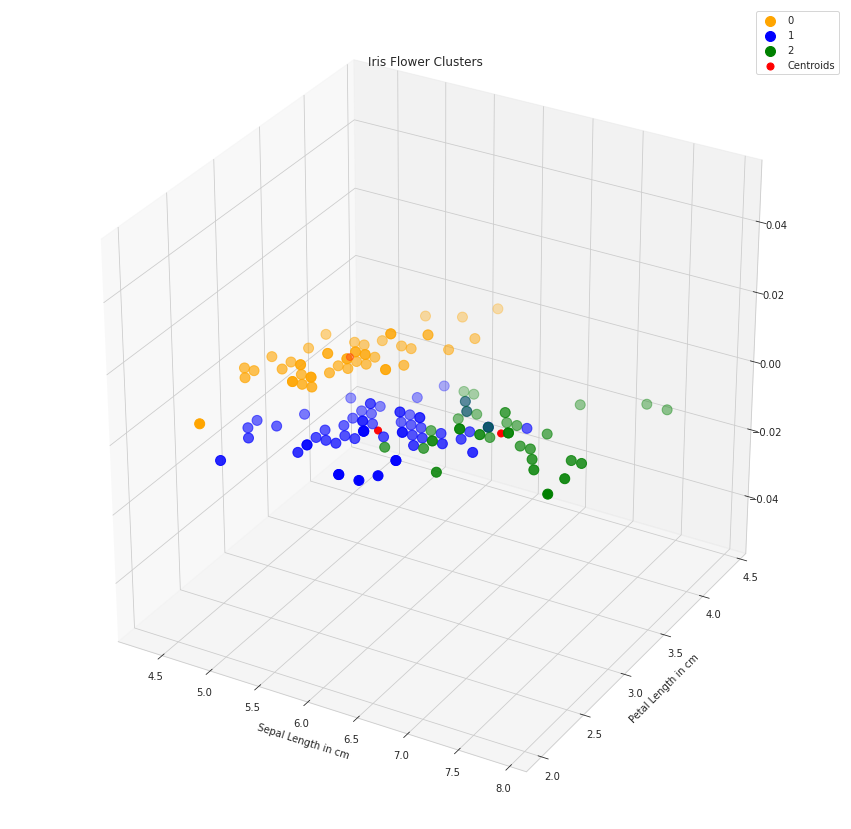

In [91]:
# Visualising the clusters with 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[identified_clusters==0, 0], X[identified_clusters==0, 1], s=100, c='orange', label='0')
plt.scatter(X[identified_clusters==1, 0], X[identified_clusters==1, 1], s=100, c='blue', label='1')
plt.scatter(X[identified_clusters==2, 0], X[identified_clusters==2, 1], s=100, c='green', label='2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()

###Labelling the predictions

In [84]:
y_kmeans = np.where(y_kmeans)

In [85]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = identified_clusters

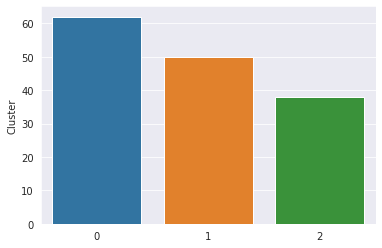

In [86]:
sns.barplot(x = data_with_clusters["Cluster"] .unique(),y = data_with_clusters["Cluster"] .value_counts())

There are around 62 with '0' label , 50 with '1' and roughly 38 with '2' labelled samples in the dataset as predicted.

### Pair plot

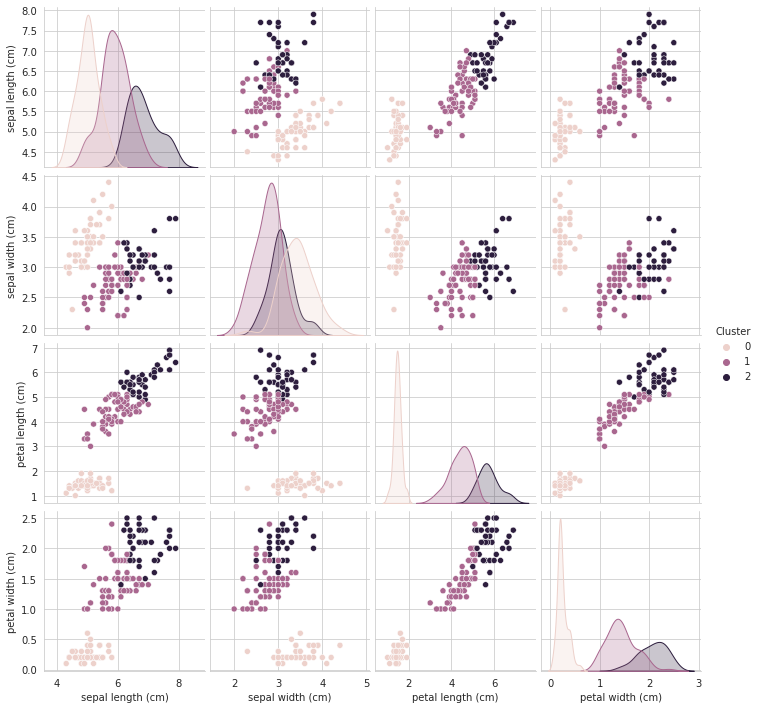

In [88]:
# hue = species colours plot as per species
  
sns.pairplot(data_with_clusters,hue = 'Cluster')

# Conclusion:
petal-length and petal-width seem to be positively correlated(having a linear relationship)<br>
'2' labelled flower seems to have smaller petal length and petal width as compared to others. Thus, it seems to have smaller dimensions than other flowers